In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle
import PIL.Image
# import winsound

In [2]:
from fbpconvnet import *
from train import *

In [4]:
fbpcnn = fbpconvnet()

X_train, X_test, E_train, E_test = load_dataset(1, 1, which='ellipses')

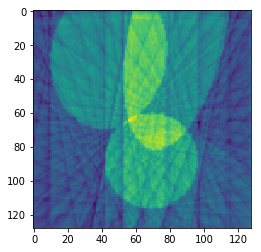

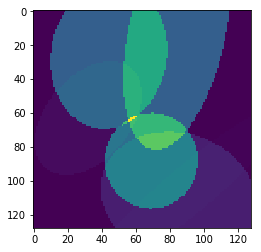

In [4]:
plt.figure(1);plt.imshow(X_train[0,:,:,0])
plt.figure(2);plt.imshow(E_train[0,:,:,0])

In [5]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), 
#               loss='mean_squared_error',#euclidean_loss,
              loss=euclidean_loss,
#               metrics=['mean_squared_error'])
              metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
#           validation_split = 0.3,
          batch_size=1,
          epochs=1)
# duration = 1000  # millisecond
# freq = 440  # Hz
# winsound.Beep(freq, duration)

Epoch 1/1
1/1 [==============================] - 1s 708ms/step - loss: 45.6777 - euclidean_loss: 45.6777


In [6]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.00005), 
#               loss='mean_squared_error',#euclidean_loss,
              loss=euclidean_loss,
#               metrics=['mean_squared_error'])
              metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
          validation_split = 0.3,
          batch_size=1,
          epochs=200)
# duration = 1000  # millisecond
# freq = 440  # Hz
# winsound.Beep(freq, duration)

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 8s 11ms/step - loss: 4.2821 - euclidean_loss: 4.2821 - val_loss: 4.5210 - val_euclidean_loss: 4.5210
Epoch 2/200
700/700 [==============================] - 7s 10ms/step - loss: 4.2768 - euclidean_loss: 4.2768 - val_loss: 4.4833 - val_euclidean_loss: 4.4833
Epoch 3/200
700/700 [==============================] - 7s 10ms/step - loss: 4.2684 - euclidean_loss: 4.2684 - val_loss: 4.4717 - val_euclidean_loss: 4.4717
Epoch 4/200
700/700 [==============================] - 7s 10ms/step - loss: 4.2684 - euclidean_loss: 4.2684 - val_loss: 4.4673 - val_euclidean_loss: 4.4673
Epoch 5/200
700/700 [==============================] - 7s 10ms/step - loss: 4.2658 - euclidean_loss: 4.2658 - val_loss: 4.4869 - val_euclidean_loss: 4.4869
Epoch 6/200
700/700 [==============================] - 7s 10ms/step - loss: 4.2664 - euclidean_loss: 4.2664 - val_loss: 4.4913 - val_euclidean_loss: 4.4913
Epoch 7/200
700/70

Epoch 53/200
700/700 [==============================] - 7s 10ms/step - loss: 4.1523 - euclidean_loss: 4.1523 - val_loss: 4.3821 - val_euclidean_loss: 4.3821
Epoch 54/200
700/700 [==============================] - 7s 10ms/step - loss: 4.1443 - euclidean_loss: 4.1443 - val_loss: 4.3813 - val_euclidean_loss: 4.3813
Epoch 55/200
700/700 [==============================] - 7s 10ms/step - loss: 4.1488 - euclidean_loss: 4.1488 - val_loss: 4.3865 - val_euclidean_loss: 4.3865
Epoch 56/200
700/700 [==============================] - 7s 10ms/step - loss: 4.1484 - euclidean_loss: 4.1484 - val_loss: 4.3714 - val_euclidean_loss: 4.3714
Epoch 57/200
700/700 [==============================] - 7s 10ms/step - loss: 4.1383 - euclidean_loss: 4.1383 - val_loss: 4.3789 - val_euclidean_loss: 4.3789
Epoch 58/200
700/700 [==============================] - 7s 10ms/step - loss: 4.1464 - euclidean_loss: 4.1464 - val_loss: 4.3881 - val_euclidean_loss: 4.3881
Epoch 59/200
700/700 [==============================] - 7s

Epoch 157/200
700/700 [==============================] - 7s 10ms/step - loss: 3.9797 - euclidean_loss: 3.9797 - val_loss: 4.2774 - val_euclidean_loss: 4.2774
Epoch 158/200
700/700 [==============================] - 7s 10ms/step - loss: 3.9939 - euclidean_loss: 3.9939 - val_loss: 4.2656 - val_euclidean_loss: 4.2656
Epoch 159/200
700/700 [==============================] - 7s 10ms/step - loss: 3.9787 - euclidean_loss: 3.9787 - val_loss: 4.2825 - val_euclidean_loss: 4.2825
Epoch 160/200
700/700 [==============================] - 7s 10ms/step - loss: 3.9842 - euclidean_loss: 3.9842 - val_loss: 4.2682 - val_euclidean_loss: 4.2682
Epoch 161/200
700/700 [==============================] - 7s 10ms/step - loss: 3.9739 - euclidean_loss: 3.9739 - val_loss: 4.3004 - val_euclidean_loss: 4.3004
Epoch 162/200
700/700 [==============================] - 7s 10ms/step - loss: 3.9793 - euclidean_loss: 3.9793 - val_loss: 4.2696 - val_euclidean_loss: 4.2696
Epoch 163/200
700/700 [=============================

In [7]:
X_recon = fbpcnn.predict(X_test)
test_loss, test_acc = fbpcnn.evaluate(X_recon, E_test)
print(test_loss, test_acc)

50/50 [==============================] - 0s 978us/step
5.254310550689698 5.254310550689698


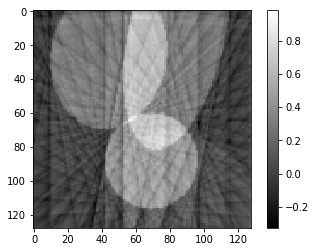

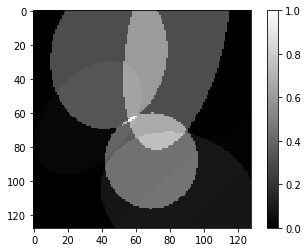

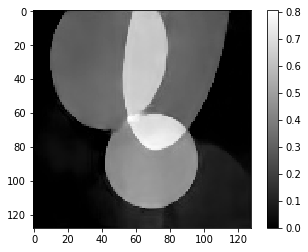

In [8]:
X_recon = fbpcnn.predict(X_train)
plt.figure(1);plt.imshow(X_train[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_train[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[0,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

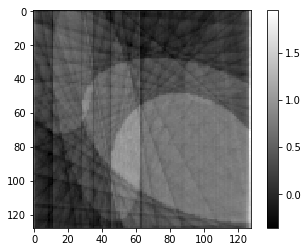

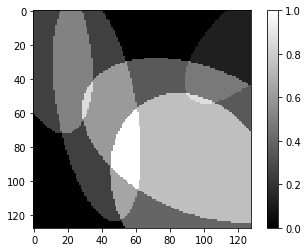

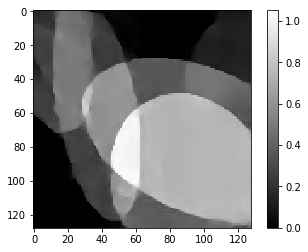

In [9]:
X_recon = fbpcnn.predict(X_test)
plt.figure(1);plt.imshow(X_test[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_test[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[0,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

In [10]:
la.norm(E_train[0,:,:,0].flatten() - X_train[0,:,:,0].flatten())

9.066773395590722

In [11]:
X_recon = fbpcnn.predict(X_test)

In [12]:
la.norm(E_test[0,:,:,0].flatten() - X_test[0,:,:,0].flatten())

18.014155009455095

In [13]:
la.norm(E_test[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

4.634426281609909

In [14]:
fbpcnn.save_weights('large_dset_no_dropout.h5')

In [15]:
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_train1000.pickle', 'wb') as output:
    pickle.dump(X_train, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_train1000.pickle', 'rb') as data:
    print(np.allclose(X_train, pickle.load(data)))
    
with open('/home/varun/fbpconvnet/datasets/Ellipses_E_train1000.pickle', 'wb') as output:
    pickle.dump(E_train, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_E_train1000.pickle', 'rb') as data:
    print(np.allclose(E_train, pickle.load(data)))
    
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_test50.pickle', 'wb') as output:
    pickle.dump(X_test, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_test50.pickle', 'rb') as data:
    print(np.allclose(X_test, pickle.load(data)))

with open('/home/varun/fbpconvnet/datasets/Ellipses_E_test50.pickle', 'wb') as output:
    pickle.dump(E_test, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_E_test50.pickle', 'rb') as data:
    print(np.allclose(E_test, pickle.load(data)))


True
True
True
True


In [6]:
with open('Z:\\documents\\ECE 551\\project\\datasets\\Ellipses_E_test5.pickle', 'rb') as data:
    E_test = pickle.load(data)
with open('Z:\\documents\\ECE 551\\project\\datasets\\Ellipses_X_test5.pickle', 'rb') as data:
    X_test = pickle.load(data)


In [7]:
fbpcnn.load_weights('large_dset_no_dropout.h5')

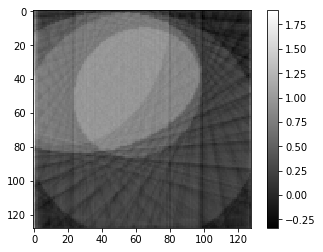

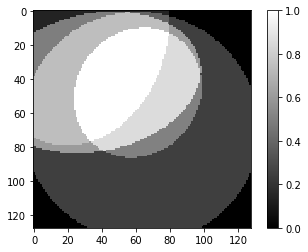

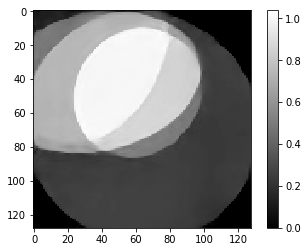

In [25]:
X_recon = fbpcnn.predict(X_test)
plt.figure(1);plt.imshow(X_test[2,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_test[2,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[2,:,:,0], cmap='gray');plt.colorbar()

In [26]:
im = PIL.Image.fromarray(E_test[2,:,:,0])
im.save('gtruth.tif')
im = PIL.Image.fromarray(X_test[2,:,:,0])
im.save('fbp.tif')
im = PIL.Image.fromarray(X_recon[2,:,:,0])
im.save("fbpcnn.tif")
